## Classification

    A classification problem is when the output variable is a category, such as “red” or “blue” or “disease” and “no disease”. A classification model attempts to draw some conclusion from observed values. Given one or more inputs a classification model will try to predict the value of one or more outcomes.
    
    For example, when filtering emails “spam” or “not spam”, when looking at transaction data, “fraudulent”, or “authorized”. In short Classification either predicts categorical class labels or classifies data (construct a model) based on the training set and the values (class labels) in classifying attributes and uses it in classifying new data. 

    Classification belongs to the category of supervised learning where the targets also provided with the input data. There are many applications in classification in many domains such as in credit approval, medical diagnosis, target marketing etc.
    There are two types of learners in classification as lazy learners and eager learners.
    
    1. Lazy learners
        
        Lazy learners simply store the training data and wait until a testing data appear. When it does, classification is conducted based on the most related data in the stored training data. Compared to eager learners, lazy learners have less training time but more time in predicting.
    For Example. k-nearest neighbor, Case-based reasoning
    
    2. Eager learners

    Eager learners construct a classification model based on the given training data before receiving data for classification. It must be able to commit to a single hypothesis that covers the entire instance space. Due to the model construction, eager learners take a long time for train and less time to predict.
    For Example. Decision Tree, Logistic Regression etc

    In this notebook we will discuss one of the lazy learner KNN classifer 

## 1. KNN

    The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

### How does the KNN algorithm work?

    Let’s take a simple case to understand this algorithm. Following is a spread of red circles and green squares:
   ![alt text](Knn.png "Title")

    You intend to find out the class of the blue star . Blue Star can either be Red Cricles or Green Square and nothing else. The “K” is KNN algorithm is the nearest neighbors we wish to take vote from. Let’s say K = 3. Hence, we will now make a circle with Blue Star as center just as big as to enclose only three datapoints on the plane. Refer to following diagram for more details:
   ![alt text](knn2.png "Title")

    
    The three closest points to Blue Star is all Red Cricles. Hence, with good confidence level we can say that the Blue Star should belong to the class Red Cricles. Here, the choice became very obvious as all three votes from the closest neighbor went to Red Cricles. The choice of the parameter K is very crucial in this algorithm. Next we will understand what are the factors to be considered to conclude the best K.

### How do you decide the number of neighbors in KNN?

    Now, you understand the KNN algorithm working mechanism. At this point, the question arises that How to choose the optimal number of neighbors? And what are its effects on the classifier? The number of neighbors(K) in KNN is a hyperparameter that you need choose at the time of model building. You can think of K as a controlling variable for the prediction model.

    Research has shown that no optimal number of neighbors suits all kind of data sets. Each dataset has it's own requirements. In the case of a small number of neighbors, the noise will have a higher influence on the result, and a large number of neighbors make it computationally expensive. Research has also shown that a small amount of neighbors are most flexible fit which will have low bias but high variance and a large number of neighbors will have a smoother decision boundary which means lower variance but higher bias.

    Generally, Data scientists choose as an odd number if the number of classes is even. You can also check by generating the model on different values of k and check their performance.
   ![alt text](knn3.png "Title")


### Implementation

    The Dataset

    We are going to use the famous iris data set for our KNN example. The dataset consists of four attributes: sepal-width, sepal-length, petal-width and petal-length. These are the attributes of specific types of iris plant. The task is to predict the class to which these plants belong. There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica. 

### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the Dataset
    To import the dataset and load it into our pandas dataframe, execute the following code:

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv(url, names=names)

In [3]:
# To see what the dataset actually looks like, execute the following command:
dataset.head()

sepal-length  sepal-width  petal-length  petal-width        Class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

### Preprocessing

    The next step is to split our dataset into its attributes and labels. To do so, use the following code:

In [4]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values


    The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.    

### Train Test Split

    To avoid over-fitting, we will divide our dataset into training and test splits, which gives us a better idea as to how our algorithm performed during the testing phase. This way our algorithm is tested on un-seen data, as it would be in a production application.

    To create training and test splits, execute the following script:

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    The above script splits the dataset into 80% train data and 20% test data. This means that out of total 150 records, the training set will contain 120 records and the test set contains 30 of those records.

### Training and Predictions:
    It is extremely straight forward to train the KNN algorithm and make predictions with it, especially when using Scikit-Learn.

In [6]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

    The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. In the second line, this class is initialized with one parameter, i.e. n_neigbours. This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, however to start out, 5 seems to be the most commonly used value for KNN algorithm.

    The final step is to make predictions on our test data. To do so, execute the following script:

In [7]:
y_pred = classifier.predict(X_test)

### Evaluating the Algorithm:

    For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. Take a look at the following script:

    A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

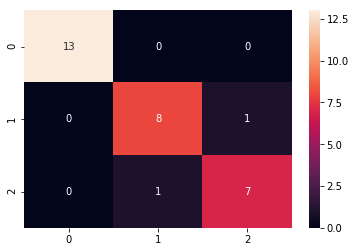

In [8]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d")


    You'll have precision, recall, f1-score and support for each class you're trying to find.

    The recall means "how many of this class you find over the whole number of element of this class"

    The precision will be "how many are correctly classified among that class"

    The f1-score is the harmonic mean between precision & recall

    The support is the number of occurence of the given class in your dataset

In [9]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       0.89      0.89      0.89         9
 Iris-virginica       0.88      0.88      0.88         8

      micro avg       0.93      0.93      0.93        30
      macro avg       0.92      0.92      0.92        30
   weighted avg       0.93      0.93      0.93        30



    The results show that our KNN algorithm was able to classify all the 30 records in the test set with 100% accuracy, which is excellent. Although the algorithm performed very well with this dataset, don't expect the same results with all applications.

### Comparing Error Rate with the K Value:
    In the training and prediction section we said that there is no way to know beforehand which value of K that yields the best results in the first go. We randomly chose 5 as the K value and it just happen to result in 100% accuracy.

    One way to help you find the best value of K is to plot the graph of K value and the corresponding error rate for the dataset.

    In this section, we will plot the mean error for the predicted values of test set for all the K values between 1 and 40.

    To do so, let's first calculate the mean of error for all the predicted values where K ranges from 1 and 40. Execute the following script:

In [10]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

    The above script executes a loop from 1 to 40. In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.

    The next step is to plot the error values against K values. Execute the following script to create the plot:

Text(0, 0.5, 'Mean Error')

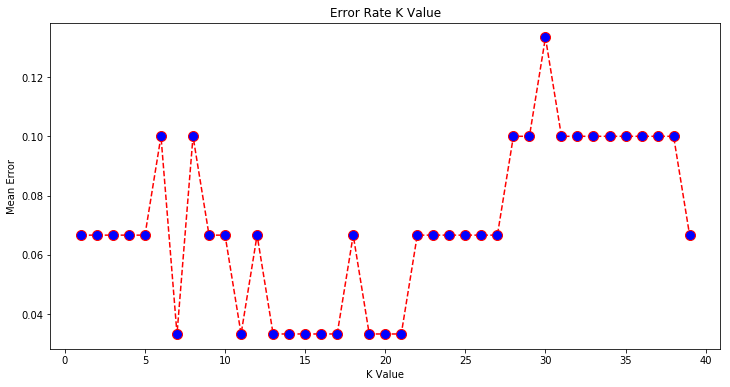

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

    From the output we can see that the mean error is zero when the value of the K is between 4 and 19. I would advise you to play around with the value of K to see how it impacts the accuracy of the predictions.

## TO-DO LIST:
    1) Scale the data used for training and see how it affects the results ?
    2) Try to implement the same algorithm on different problems.
    3) Try KNN for regression problem. (Can you think how it can work for a regresion problem )